# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [6]:
#test
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Softmax
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import os
import numpy as np
import matplotlib.pyplot as plt


#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
y_train[0]

array([6], dtype=uint8)

In [8]:
type(np.uint8(6))

numpy.uint8

In [9]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
np.shape(y_train)

(50000, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

In [11]:
np.argmax(y_train,axis=1)

array([6, 9, 9, ..., 9, 1, 1])

<Figure size 432x288 with 0 Axes>

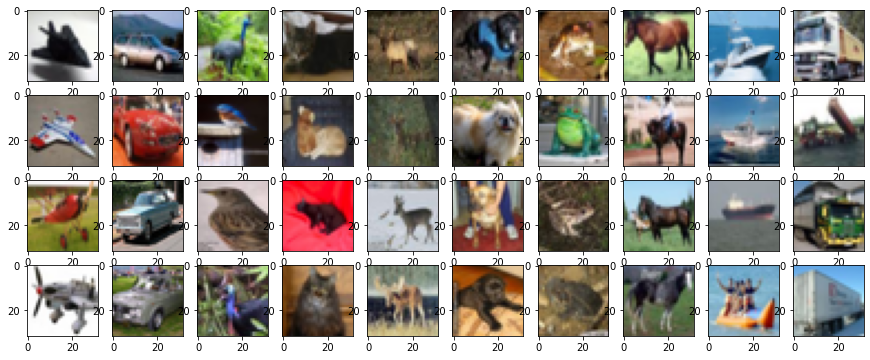

In [12]:
#class_no = 3
#class_zero=x_train[np.argmax(y_train,axis=1)==class_no]
#print(np.shape(class_zero))

plt.figure()
f,axarr = plt.subplots(4,num_classes,figsize=(15,6))
for class_no in range(num_classes):
  i=0
  x_class=x_train[np.argmax(y_train,axis=1)==class_no]
  while i<4:

    axarr[i][class_no].imshow(x_class[i,:,:,:])
    i=i+1


In [19]:
inputs = keras.Input(shape=(32,32,3))
l1= Rescaling(scale=1.0/255)(inputs)

l2= Conv2D(filters=96,kernel_size=(3,3),activation="relu",strides=4)(l1)
l3= MaxPooling2D(pool_size=(3,3),strides=1)(l2)


l4= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l3)
l5= MaxPooling2D(pool_size=(3,3),strides=1)(l4)


l6= Conv2D(filters=384,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l5)

l7= Conv2D(filters=384,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l6)

l8= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l7)
l9= MaxPooling2D(pool_size=(3,3),strides=2)(l8)

l10=Dense(4096,activation='relu')(l9)

l11=Dense(4096,activation='relu')(l10)

outputs=Dense(num_classes,activation='softmax')(l11)


In [20]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [25]:
processed_data = model(x_train[0:100,:,:,:])
print(processed_data.shape)


(100, 1, 1, 10)


In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 256)         221440    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 384)         885120

In [49]:
#weniger Parameter
inputs = keras.Input(shape=(32,32,3))
l1= Rescaling(scale=1.0/255)(inputs)

l2= Conv2D(filters=96,kernel_size=(3,3),activation="relu",strides=4)(l1)
l3= MaxPooling2D(pool_size=(3,3),strides=1)(l2)


l4= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l3)
l5= MaxPooling2D(pool_size=(3,3),strides=1)(l4)


l6= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l5)
l7= MaxPooling2D(pool_size=(3,3),strides=2)(l6)

l8=Flatten()(l7)
l9=Dense(4096,activation='relu')(l8)

outputs=Dense(num_classes,activation='softmax')(l9)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_14 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 6, 6, 256)         221440    
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 256)         5900

In [50]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics = ['accuracy'])

In [51]:
np.shape(y_train)

(50000, 10)

In [52]:
history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 246s 157ms/step - loss: 1.8640 - accuracy: 0.2892
Epoch 2/10
1563/1563 [==============================] - 240s 154ms/step - loss: 1.3987 - accuracy: 0.4869
Epoch 3/10
1563/1563 [==============================] - 236s 151ms/step - loss: 1.2728 - accuracy: 0.5407
Epoch 4/10
1563/1563 [==============================] - 233s 149ms/step - loss: 1.1660 - accuracy: 0.5813
Epoch 5/10
1563/1563 [==============================] - 235s 150ms/step - loss: 1.0914 - accuracy: 0.6088
Epoch 6/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.0286 - accuracy: 0.6320
Epoch 7/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.9723 - accuracy: 0.6515
Epoch 8/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.9330 - accuracy: 0.6660
Epoch 9/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.8751 - accuracy: 0.6847
Epoch 10/10
1563/1563 [=======================

In [53]:
loss,acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.1258 - accuracy: 0.6157


**Dinge die man sich noch anschauen kann, um Ergebnis zu verbessern:**
- evtl zusätzlich Dropoutlayer gegen Overfittung
- geringere pooling kernel um mehr informationen beizubehalten und somit genauer zu lernen
- testen was passiert wenn dense_layer mit 4096 Neuronen weggelassen wird.
- Batch normalization layers hinzufügen?

In [29]:
#eigentliches AlexNet

# inputs = keras.Input(shape=(32,32,3))
# l1= Rescaling(scale=1.0/255)(inputs)

# l2= Conv2D(filters=96,kernel_size=(11,11),activation="relu",strides=4)(l1)
# l3= MaxPooling2D(pool_size=(3,3),strides=2)(l2)


# l4= Conv2D(filters=256,kernel_size=(5,5),activation="relu",strides=1,padding="same")(l3)
# l5= MaxPooling2D(pool_size=(3,3),strides=2)(l4)


# l6= Conv2D(filters=384,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l5)

# l7= Conv2D(filters=384,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l6)

# l8= Conv2D(filters=256,kernel_size=(3,3),activation="relu",strides=1,padding="same")(l7)
# l9= MaxPooling2D(pool_size=(3,3),strides=2)(l8)

# l10=Dense(4096,activation='relu')(l9)

# l11=Dense(4096,activation='relu')(l10)

# l12=Dense(num_classes,activation='softmax')(l11)

